# We've got result of two campaigns:
 - Control
 - Test

# Below you can see all the features in the datasets: 

- Campaign Name: The name of the campaign (Groups)
- Date: Date of the record (Date)
- Spend: Amount spent on the campaign in dollars (Revenue)
- of Impressions: Number of impressions the ad crossed through the campaign (Impressions)
- Reach: The number of unique impressions received in the ad (Uniq_users)
- of Website Clicks: Number of website clicks received through the ads (Clicks)
- of Searches: Number of users who performed searches on the website (Searches)
- of View Content: Number of users who viewed content and products on the website (Views)
- of Add to Cart: Number of users who added products to the cart (a2c)
- of Purchase: Number of purchases (Orders)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import datetime
import seaborn as sns
import numpy as np
from datetime import datetime, date, timedelta
pio.templates.default = "plotly_dark"

In [2]:
control_data = pd.read_csv('control_group.csv', sep=';')
test_data = pd.read_csv('test_group.csv', sep=';')

In [3]:
print(control_data.head())
print(test_data.head())

      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3   

We have see that columns have mistakes at names.

In [4]:
test_data.columns = ['Campaign name', 'Date', 'Amount spent', 'Number of impressions', 'Number of unique impressions', 'Number of website clicks', 'Searches', 'Views', 'Add to cart', 'Number of purchases']
control_data.columns = ['Campaign name', 'Date', 'Amount spent', 'Number of impressions', 'Number of unique impressions', 'Number of website clicks', 'Searches', 'Views', 'Add to cart', 'Number of purchases']


In [5]:
print(test_data.isnull().sum())
print(control_data.isnull().sum())

Campaign name                   0
Date                            0
Amount spent                    0
Number of impressions           0
Number of unique impressions    0
Number of website clicks        0
Searches                        0
Views                           0
Add to cart                     0
Number of purchases             0
dtype: int64
Campaign name                   0
Date                            0
Amount spent                    0
Number of impressions           1
Number of unique impressions    1
Number of website clicks        1
Searches                        1
Views                           1
Add to cart                     1
Number of purchases             1
dtype: int64


Method isnull() helps to check data on NULLs values and method sum() in the end helps us to sum this for useful format

The dataset of the control campaign has missing values in a row. Let’s fill in these missing values by the mean value of each column:

In [7]:
control_data["Number of impressions"].fillna(value=control_data["Number of impressions"].mean(), 
                                             inplace=True)
control_data["Number of unique impressions"].fillna(value=control_data["Number of unique impressions"].mean(), 
                                             inplace=True)
control_data["Number of website clicks"].fillna(value=control_data["Number of website clicks"].mean(), 
                                             inplace=True)
control_data["Searches"].fillna(value=control_data["Searches"].mean(), 
                                             inplace=True)
control_data["Views"].fillna(value=control_data["Views"].mean(), 
                                             inplace=True)
control_data["Add to cart"].fillna(value=control_data["Add to cart"].mean(), 
                                             inplace=True)
control_data['Number of purchases'].fillna(value=control_data['Number of purchases'].mean(),
                                             inplace=True)

Now I will create a new dataset by merging both datasets:

In [34]:
ab_data = test_data.merge(control_data, how='outer').sort_values(by='Date')

ab_data = ab_data.reset_index(drop=True)
print(ab_data['Campaign name'].value_counts())
ab_data.head(10)

Test Campaign       30
Control Campaign    30
Name: Campaign name, dtype: int64


/var/folders/z2/t5p0hqvs2m341q1b8lvg863w0000gn/T/ipykernel_2752/4238670878.py:1: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.



,Campaign name,Date,Amount spent,Number of impressions,Number of unique impressions,Number of website clicks,Searches,Views,Add to cart,Number of purchases
0,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
1,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
2,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
3,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
4,Control Campaign,11.08.2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0
5,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0
6,Control Campaign,12.08.2019,2319,116639.0,100189.0,2993.0,1397.0,1147.0,1439.0,794.0
7,Test Campaign,12.08.2019,2831,124591.0,10598.0,8264.0,2081.0,1992.0,1382.0,709.0
8,Control Campaign,13.08.2019,2697,82847.0,68214.0,6554.0,2390.0,1975.0,1794.0,766.0
9,Test Campaign,13.08.2019,1972,65827.0,49531.0,7568.0,2213.0,2058.0,1391.0,812.0


# See all data on dependencies (Correlations) by campaign name

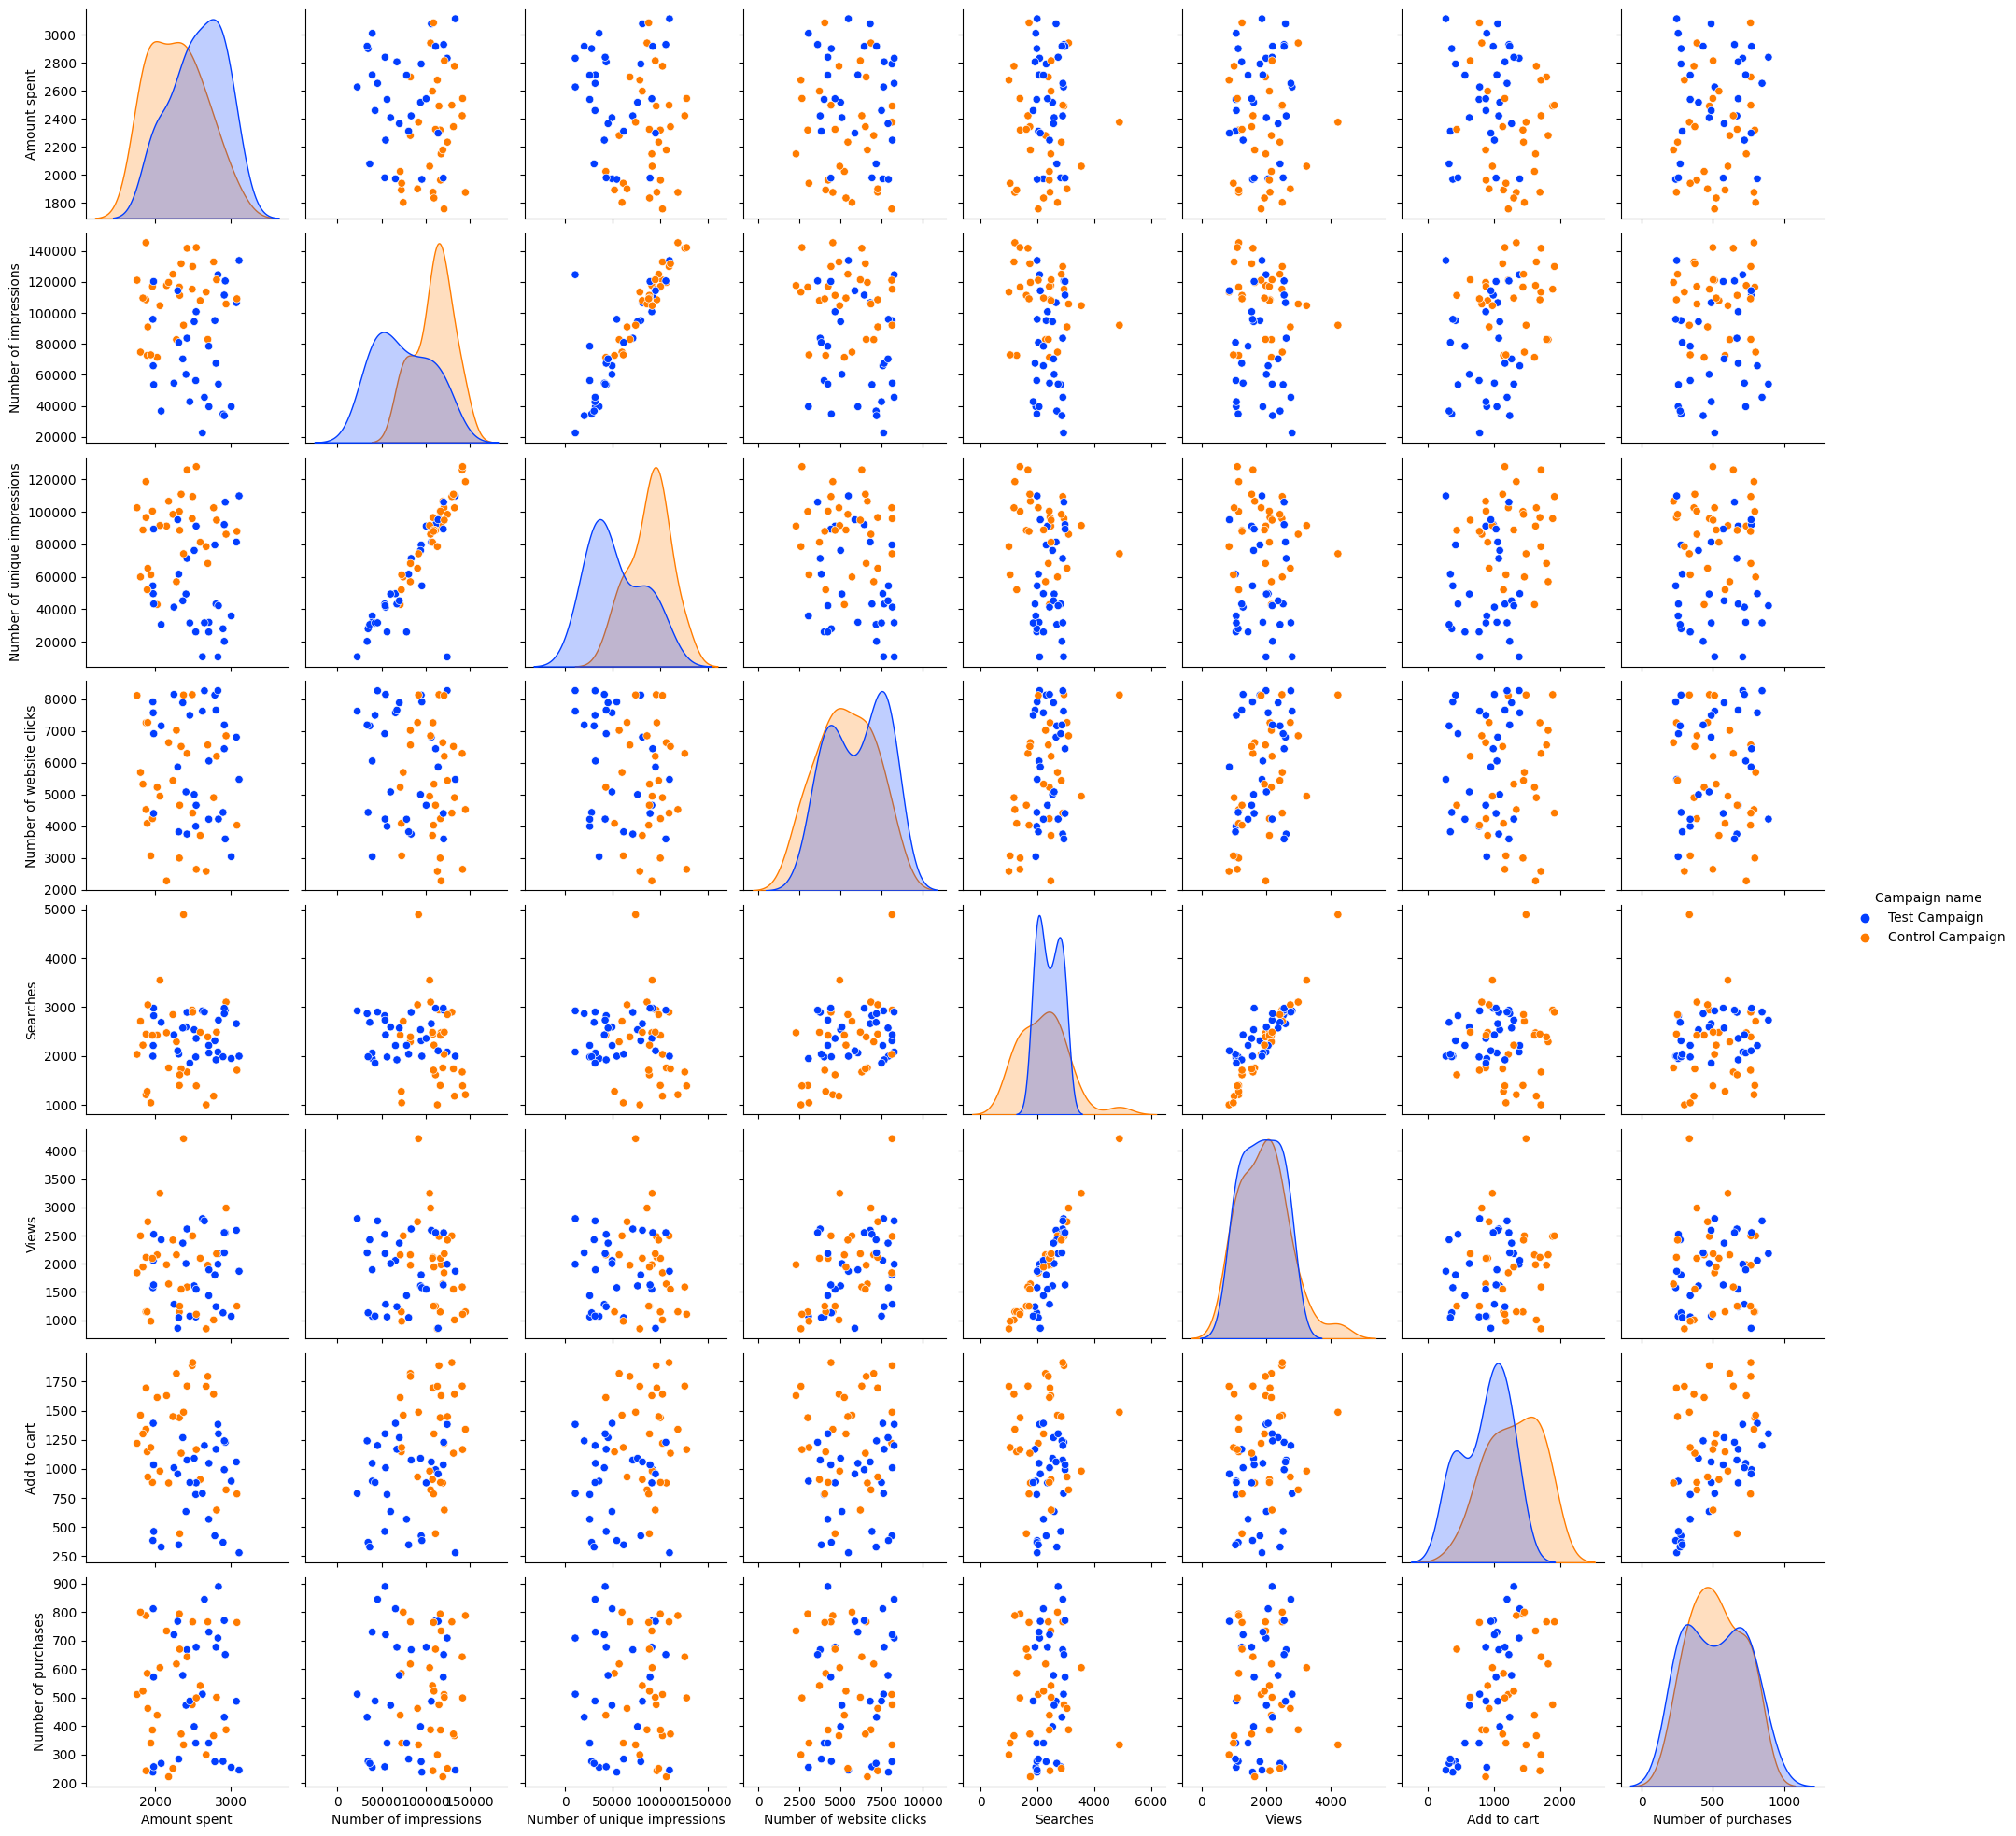

In [102]:
sns.pairplot(ab_data, hue = 'Campaign name')

# Check data for possible emissions

In [101]:
#a2c
a2c = px.box(
        ab_data,
        x='Add to cart',
        color='Campaign name'
)

#views
views = px.box(
        ab_data,
        x='Views',
        color='Campaign name'
)

#searches
searches = px.box(
        ab_data,
        x='Searches',
        color='Campaign name'
)

#amount_spent
amount_spent = px.box(
        ab_data,
        x='Amount spent',
        color='Campaign name'
)


a2c.show()
views.show()
searches.show()
amount_spent.show()


The dataset has 30 samples for each campaign. Now let’s start with A/B testing to find the best marketing strategy.

In [86]:
px.scatter(ab_data,
              x='Number of impressions',
              y='Amount spent',
              size = 'Amount spent',
              color='Campaign name',
              trendline='ols'
          )

In [33]:
#searches
searches_pie = go.Figure(data=[go.Pie(labels=["Total Searches from Control Campaign","Total Searches from Test Campaign"], 
                       values=[ab_data[ab_data['Campaign name']=='Test Campaign']['Searches'].sum(), 
                               ab_data[ab_data['Campaign name']=='Control Campaign']['Searches'].sum()],
                      )])
colors = ['gold', 'orange']
searches_pie.update_layout(title_text='Control Vs Test: Searches')
searches_pie.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='white', width=3)))

#views
views = go.Figure(data=[go.Pie(labels=["Total Views from Control Campaign","Total Views from Test Campaign"], 
                       values=[ab_data[ab_data['Campaign name']=='Test Campaign']['Views'].sum(), 
                               ab_data[ab_data['Campaign name']=='Control Campaign']['Views'].sum()],
                      )])
colors = ['purple', 'olive']
views.update_layout(title_text='Control Vs Test: Views')
views.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='white', width=3)))

#a2c
a2c = go.Figure(data=[go.Pie(labels=["Total A2C from Control Campaign","Total A2C from Test Campaign"], 
                       values=[ab_data[ab_data['Campaign name']=='Test Campaign']['Add to cart'].sum(), 
                               ab_data[ab_data['Campaign name']=='Control Campaign']['Add to cart'].sum()],
                      )])
colors = ['tomato', 'midnightblue']
a2c.update_layout(title_text='Control Vs Test: Add to cart')
a2c.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='white', width=3)))

#number_of_purchases
number_of_purchases = go.Figure(data=[go.Pie(labels=["Total Number of purchases from Control Campaign","Total Number of purchases from Test Campaign"], 
                       values=[ab_data[ab_data['Campaign name']=='Test Campaign']['Number of purchases'].sum(), 
                               ab_data[ab_data['Campaign name']=='Control Campaign']['Number of purchases'].sum()],
                      )])
colors = ['powderblue', 'navy']
number_of_purchases.update_layout(title_text='Control Vs Test: Number of purchases')
number_of_purchases.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='white', width=3)))

#amount_spent
amount_spent = go.Figure(data=[go.Pie(labels=["Total Amount spent from Control Campaign","Total Amount spent from Test Campaign"], 
                       values=[ab_data[ab_data['Campaign name']=='Test Campaign']['Amount spent'].sum(), 
                               ab_data[ab_data['Campaign name']=='Control Campaign']['Amount spent'].sum()],
                      )])
colors = ['floralwhite', 'indigo']
amount_spent.update_layout(title_text='Control Vs Test: Amount spent')
amount_spent.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='white', width=3)))

#show all pies
searches_pie.show()
views.show()
a2c.show()
number_of_purchases.show()
amount_spent.show()



# Conclusion

From the above A/B tests, we found that the control campaign resulted in more sales and engagement from the visitors. More products were viewed from the control campaign, resulting in more products in the cart and more sales. But the conversation rate of products in the cart is higher in the test campaign. The test campaign resulted in more sales according to the products viewed and added to the cart. And the control campaign results in more sales overall. So, the Test campaign can be used to market a specific product to a specific audience, and the Control campaign can be used to market multiple products to a wider audience.

Great thanks to Aman Kharwal for datasets and for his version of the analysis <3